<a href="https://colab.research.google.com/github/Martipetti/MachineLearning/blob/main/reti_neurali_versione_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reti Neurali

In questo laboratorio vedremo come applicare le reti neurali al dataset **Iris**.
Iniziamo con l'import del dataset.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [156]:
import pandas as pd
from sklearn.datasets import load_iris

# iris = load_iris()

# df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# df['target'] = iris.target

df = pd.read_csv("drive/MyDrive/Appunti Università/Magistrale/Machine Learning/Risorse laboratorio/Laboratorio 4 - Decision Tree/titanic.csv", sep=",")

feature_names = set(df.columns) - set(["Survived"])
target_name = "Survived"

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dividiamo il dataset di iris in train e test

In [157]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [158]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df["target"], test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_name], test_size=0.3, random_state=42)

X_train = X_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
X_test = X_test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

feature_names = feature_names - set(["PassengerId", "Name", "Ticket", "Cabin"])

label_encoder = LabelEncoder()
for col in ["Sex", "Embarked"]:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

eta_media = X_train["Age"].mean()
X_train["Age"] = X_train["Age"].fillna(eta_media)
X_test["Age"] = X_test["Age"].fillna(eta_media)

for col in X_train.columns:
  X_train[col] = X_train[col].astype(int)
  X_test[col] = X_test[col].astype(int)

<ipython-input-159-400ca9842b23>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_name], test_size=0.3, random_state=42)


In [160]:
X_train.dtypes

Sex         int64
SibSp       int64
Age         int64
Embarked    int64
Parch       int64
Pclass      int64
Fare        int64
dtype: object

In [161]:
X_train.head()

,Sex,SibSp,Age,Embarked,Parch,Pclass,Fare
445,1,0,4,2,2,1,81
650,1,0,29,2,0,3,7
172,0,1,1,2,1,3,11
450,1,1,36,2,2,2,27
314,1,1,43,2,1,2,26


Per migliorare il training della rete neurale, standardizziamo tutte le features

---



In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[list(feature_names)] = scaler.fit_transform(X_train[list(feature_names)])
X_test[list(feature_names)] = scaler.transform(X_test[list(feature_names)])

X_train.describe()

,Sex,SibSp,Age,Embarked,Parch,Pclass,Fare
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,5.560025e-17,-3.991813e-17,1.425648e-17,1.140518e-16,-5.702590e-18,2.537653e-16,2.281036e-17
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-1.387401e+00,-4.741614e-01,-2.241429e+00,-2.009655e+00,-4.793271e-01,-1.637881e+00,-6.159949e-01
25%,-1.387401e+00,-4.741614e-01,-5.521611e-01,-7.215736e-01,-4.793271e-01,-4.173071e-01,-4.787470e-01
50%,7.207719e-01,-4.741614e-01,-1.466678e-02,5.665076e-01,-4.793271e-01,8.032671e-01,-3.414990e-01
75%,7.207719e-01,3.486869e-01,4.460426e-01,5.665076e-01,-4.793271e-01,8.032671e-01,-1.798606e-02
max,7.207719e-01,6.108625e+00,3.901363e+00,1.854589e+00,6.955215e+00,8.032671e-01,9.422711e+00


Convertiamo la label a categorica. In questo lab useremo la libreria **Keras**, poichè consente di implementare facilmente le reti neurali. Invece, la libreria Scikit-learn viene usata per modelli di machine learning base.

Ogni etichetta di classe sarà mappata ad un vettore one-hot:
* etichetta 1 --> [1, 0, 0]
* etichetta 2 --> [0, 1, 0]
* etichetta 3 --> [0, 0, 1]

In [163]:
import keras

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [164]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

A questo punto, utilizziamo la libreria **Keras** che permette di implementare facilmente una rete neurale

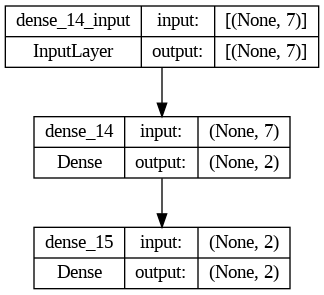

In [165]:
from keras.models import Sequential
from keras.layers import Dense

# Definiamo l'archietettura della rete neurale:
# un primo layer di input con 4 neuroni (perchè ci sono 4 features in input)
# un scondo layer con 3 neuroni
# un ultimo layer con 3 neuroni, poiché la label è un vettore di 3 componenti (es [0, 1, 0])
model = Sequential()
model.add(Dense(2, input_shape=(7,), activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

Facciamo il training della rete e valutiamo le performance

In [166]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 0.6845 - accuracy: 0.6132 - val_loss: 0.6645 - val_accuracy: 0.6679
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.7303 - val_loss: 0.6298 - val_accuracy: 0.7463
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7528 - val_loss: 0.5929 - val_accuracy: 0.7910
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.7769 - val_loss: 0.5585 - val_accuracy: 0.8134
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7849 - val_loss: 0.5305 - val_accuracy: 0.8172
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7897 - val_loss: 0.5077 - val_accuracy: 0.8209
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7929 - val_loss: 0.4868 - val_accuracy: 0.8097
Epoch 

In [167]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Saved model to disk


## Assignment

1. Provare ad usare diverse funzioni di attivazione, come "tanh".
2. Quante epoche sono necessarie per raggiungere la convergenza?
3. Cosa succede cambiando l'architettura della rete?
4. Cosa succede cambiando la loss function?